# 분류
### 당뇨병 예측

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 전처리 생략

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# 데이터 분리(학습/검증/테스트)

X = df.iloc[:,:-1]
y = df.iloc[:, -1]

X.shape

(768, 8)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2022)
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [9]:
# 검증 데이터 분리

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2, random_state=2022)
X_train.shape, X_val.shape

((491, 8), (123, 8))

In [66]:
# from sklearn.preprocessing import StandardScaler

# ss=StandardScaler()
# X_train_scaled = ss.ss.ss.s


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
588,3,176,86,27,156,33.3,1.154,52
112,1,89,76,34,37,31.2,0.192,23
443,8,108,70,0,0,30.5,0.955,33
734,2,105,75,0,0,23.3,0.560,53
237,0,179,90,27,0,44.1,0.686,23
...,...,...,...,...,...,...,...,...
700,2,122,76,27,200,35.9,0.483,26
39,4,111,72,47,207,37.1,1.390,56
612,7,168,88,42,321,38.2,0.787,40
41,7,133,84,0,0,40.2,0.696,37


### 모델

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(12, input_shape=(8,), activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# 출력층에 주의 # 이진분류 출력 - unit : 1(0or1), sigmoid 사용 0,1로 출력


### 모델 컴파일
- 손실함수
- 옵티마이저

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
EPOCHS = 500
BATCH_SIZE = 32  # 미니배치, 32씩 배치 처리

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data = (X_val, y_val))


In [16]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [19]:
len(history.epoch)

500

In [35]:
# 결과 시각화 함수

def plot_history(history):
  hist = history.history
  plt.figure(figsize=(8,5))
  plt.subplot(1,2,1)
  plt.plot(history.epoch, hist['loss'], label="loss")
  plt.plot(history.epoch, hist['val_loss'], label='val_loss')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(history.epoch, hist['acc'], label="acc")
  plt.plot(history.epoch, hist['val_acc'], label='val_acc')
  plt.legend()
  plt.show()

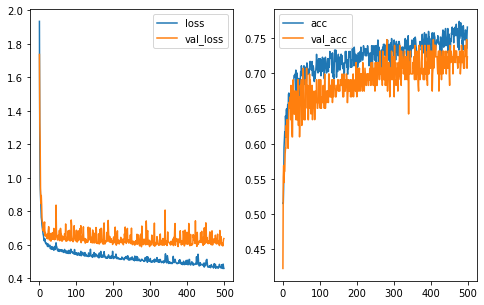

In [36]:
plot_history(history)

In [37]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.5070 - acc: 0.7532


[0.5069805979728699, 0.7532467246055603]

In [60]:
# 예측

y_pred = model.predict(X_test)
y_pred[:5]   # 마지막에 sigmoid를 사용해서 확률로 출력됨, 0.5보다 크면 1, 작으면 0

array([[0.7770933 ],
       [0.48541343],
       [0.20502016],
       [0.09615377],
       [0.39954463]], dtype=float32)

In [61]:
y_pred = (y_pred > 0.5).astype(np.int32).flatten()
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [62]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7532467532467533

In [64]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)


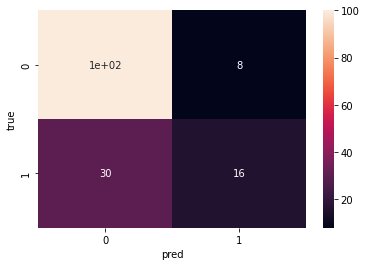

In [65]:
import seaborn as sns
sns.heatmap(cfm, annot=True)
plt.xlabel('pred')
plt.ylabel('true')
plt.show()
